In [1]:
import matplotlib
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

from IPython.display import Image
from matplotlib import pyplot as plt

In [2]:
import os
IMG_FOLDER = 'img'

os.makedirs(IMG_FOLDER, exist_ok=True)

# Simple function

- Сгенерируйте данные для функции $y = x^3$. Возьмите числа от 0 до 99.
- Отобразите данные на графике. Обозначьте кажду точку в виде красного "+"
- Подпишите оси
- Дайте название графику

## Simple Matplotlib plot

In [3]:
n_points = 100

data = np.arange(n_points) ** 3

*Пример*

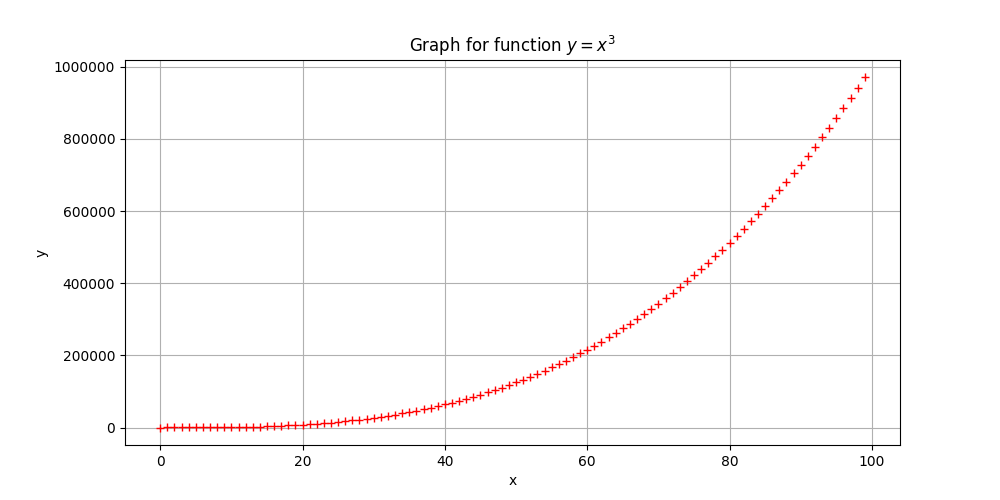

In [48]:
Image(filename=os.path.join(IMG_FOLDER,'task0_1.png'))

*Решение*

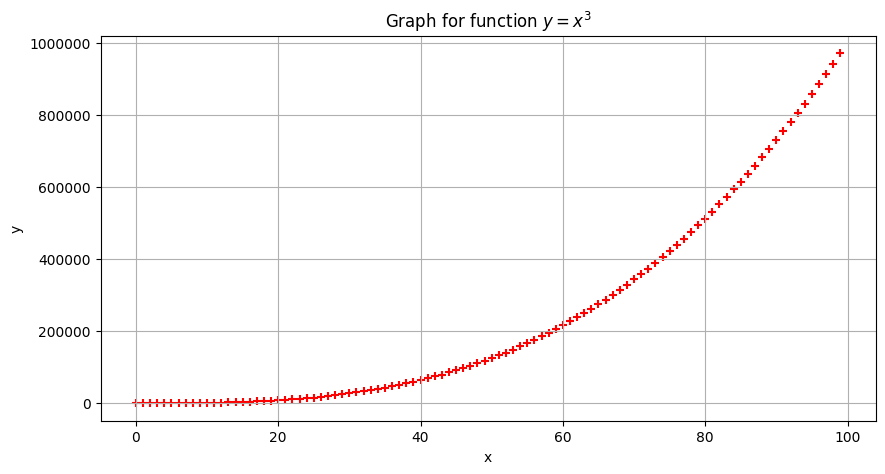

## Plot two lines

Представьте что вы сделали модель и предсказали еще 10 точек для вашего графика выше. Вы имеете точные значения и оценки на их вероятные верхние и нижние границы.

Постройте график, где сначала красным цветом будут показываться ваши "тренировочные" данные, а дальше желтым -- "предсказания". Светло-желтым закрасьте области между верхней и нижней границей для каждой точки, подпишите ее как CI в графике

In [7]:
preds_size = 10

preds = np.arange(len(data), len(data) + preds_size) ** 3

all_data = np.concatenate((data, preds))
stds = np.array([np.std(all_data[i - 50: i]) for i in range(len(data), len(data) + preds_size)])

l_bounds = preds - stds
h_bounds = preds + stds

*Пример*

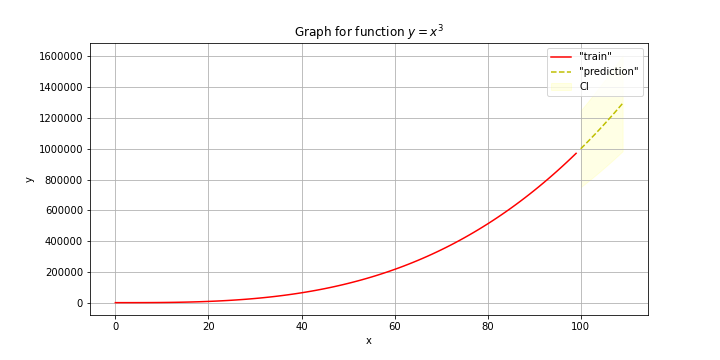

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task0_2.png'))

*Решение*

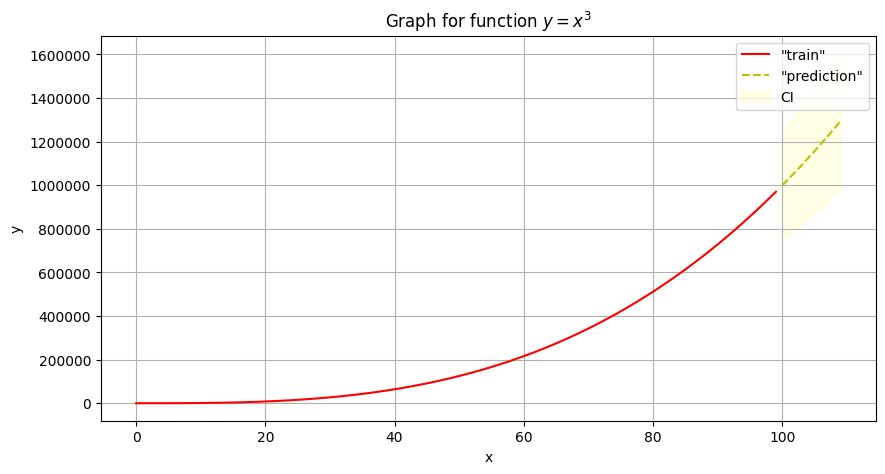

## Using Plotly

**Давайте теперь сделаем интерактивный график в plotly**

https://plotly.com/python/marker-style/#using-a-custom-marker

*Пример*

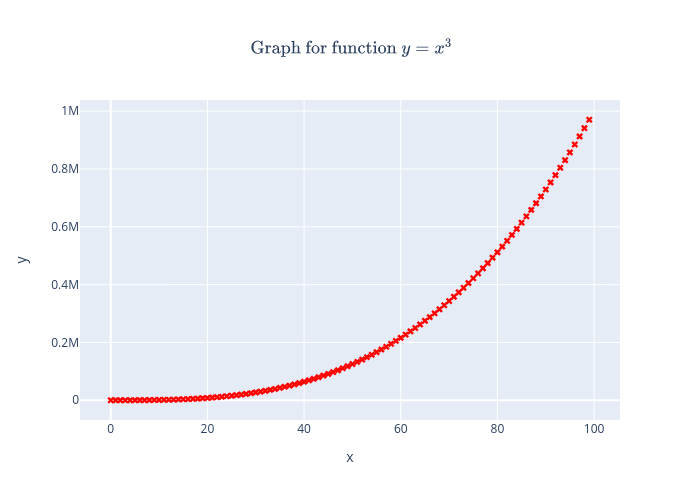

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task0_1_plotly.png'))

*Решение*

**Добавим "предикты" с интервалами по аналогии с matplotlib**

*Пример*

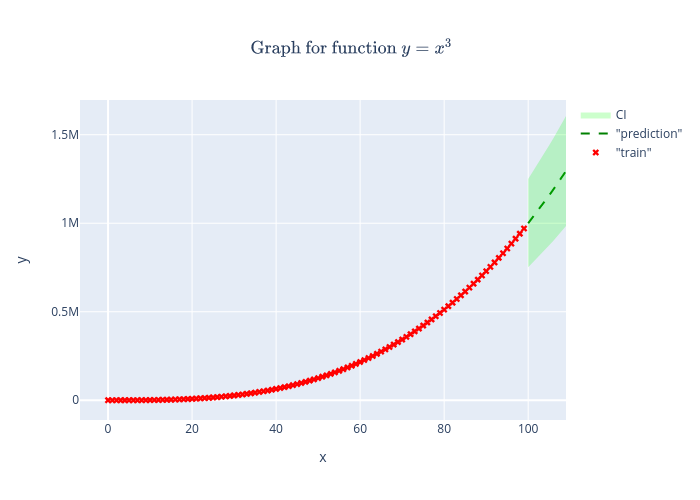

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task0_2_plotly.png'))

*Решение*

In [15]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task0_2_plotly.png'))

# Figure for artificial data. Subplots. Line plot. Scatter plot

In [16]:
np.random.seed(42)

df = pd.DataFrame(data={'column_a':np.random.randint(0, 100, 30),
                        'column_b':np.random.randint(0, 100, 30),
                        'column_c':np.random.randint(0, 100, 30)})
df.head()

,column_a,column_b,column_c
0,51,90,91
1,92,58,59
2,14,41,70
3,71,91,43
4,60,59,7


Постройте два графика в одной большой фигуре.
Назовите фигуру "Task 1", используйте шрифт размера 20.

- Пошарьте ось x между графиками. Назовите ее "index".

- На первом графике:
    - нарисуйте две линии по данным "column_a", и "column_b";
    - сделайте "легенду" в верхней части графика, обозначьте оранжевым цветом данные из колонки a, синим -- данные из колонки b;
    - дайте название оси y: value;
    - назовите график "Line plots for column_a, column_b"

- На втором графике:
    - покажите зелеными точками данные из третьей колонки;
    - сделайте легенду в правом нижнем углу
    - назовите график "Scatter plot for column_c";

- Сохраните получившийся график в формат .png с названием 'task1_1.png'


https://matplotlib.org/stable/tutorials/colors/colors.html

*Пример*

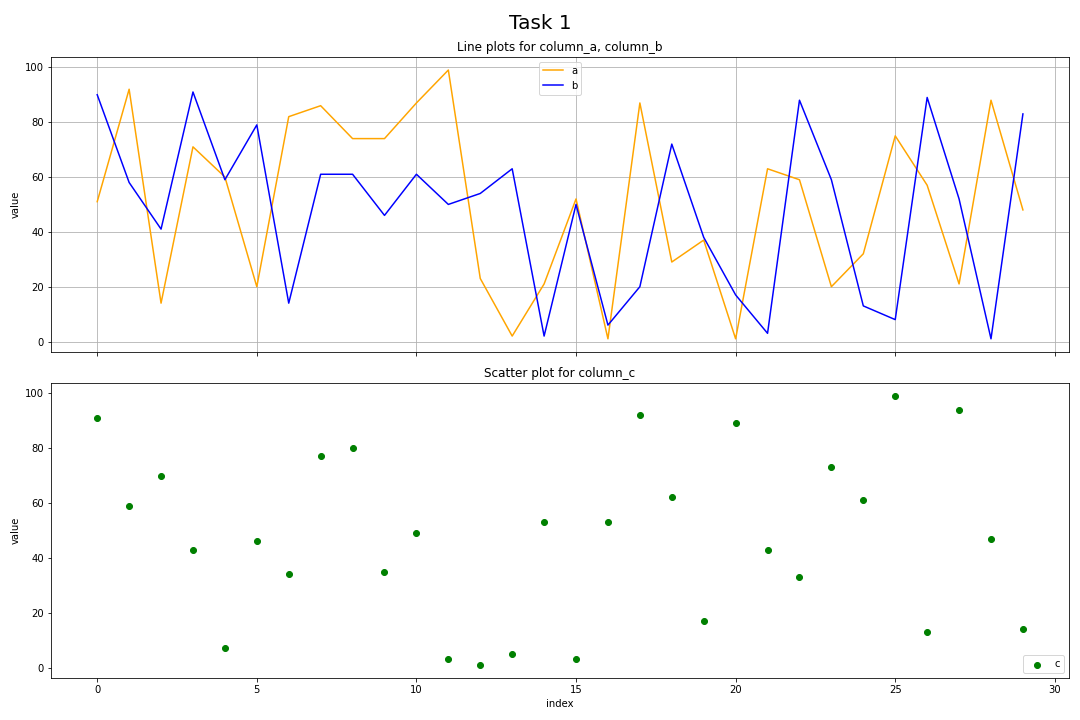

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task1.png'))

*Решение*

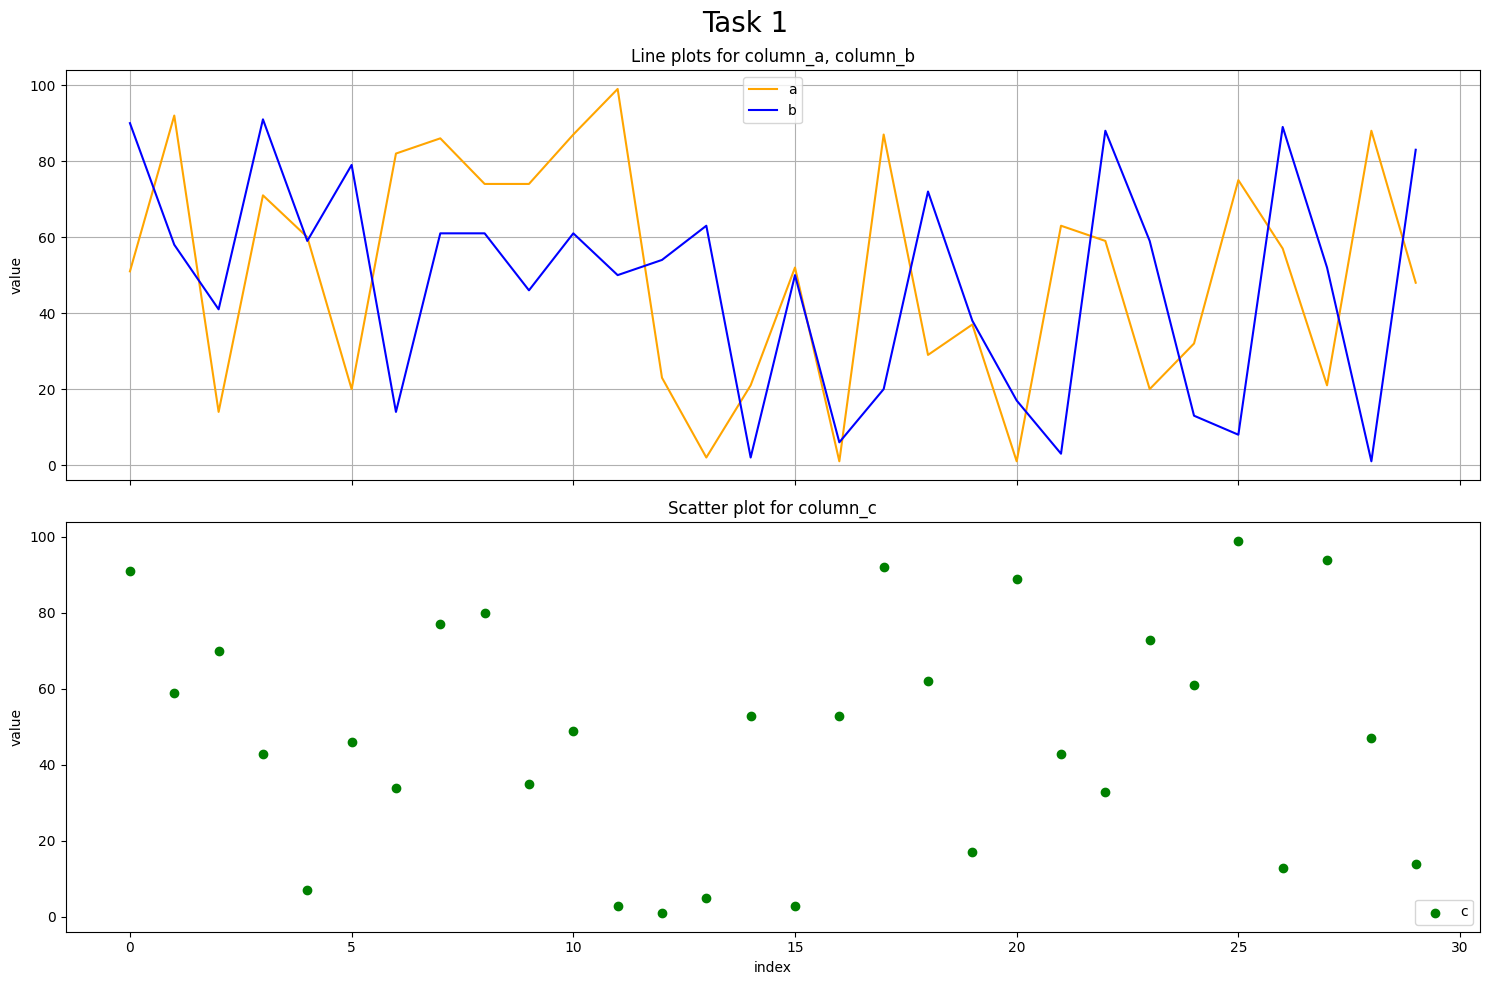

In [18]:
# fig.savefig(os.path.join(IMG_FOLDER, 'task1.png'))

## Bar plot

Для датафрейма выше постройте bar plots отдельно для данных из колонок a, b, c. Подпишите значения в каждом "столбике" (`ax.bar_label` может помочь)

PS для однотипных операций используйте циклы

In [19]:
from itertools import cycle
COLORS = cycle(['b','g','r','c','m','y'])

### Using Matplotlib

*Пример*

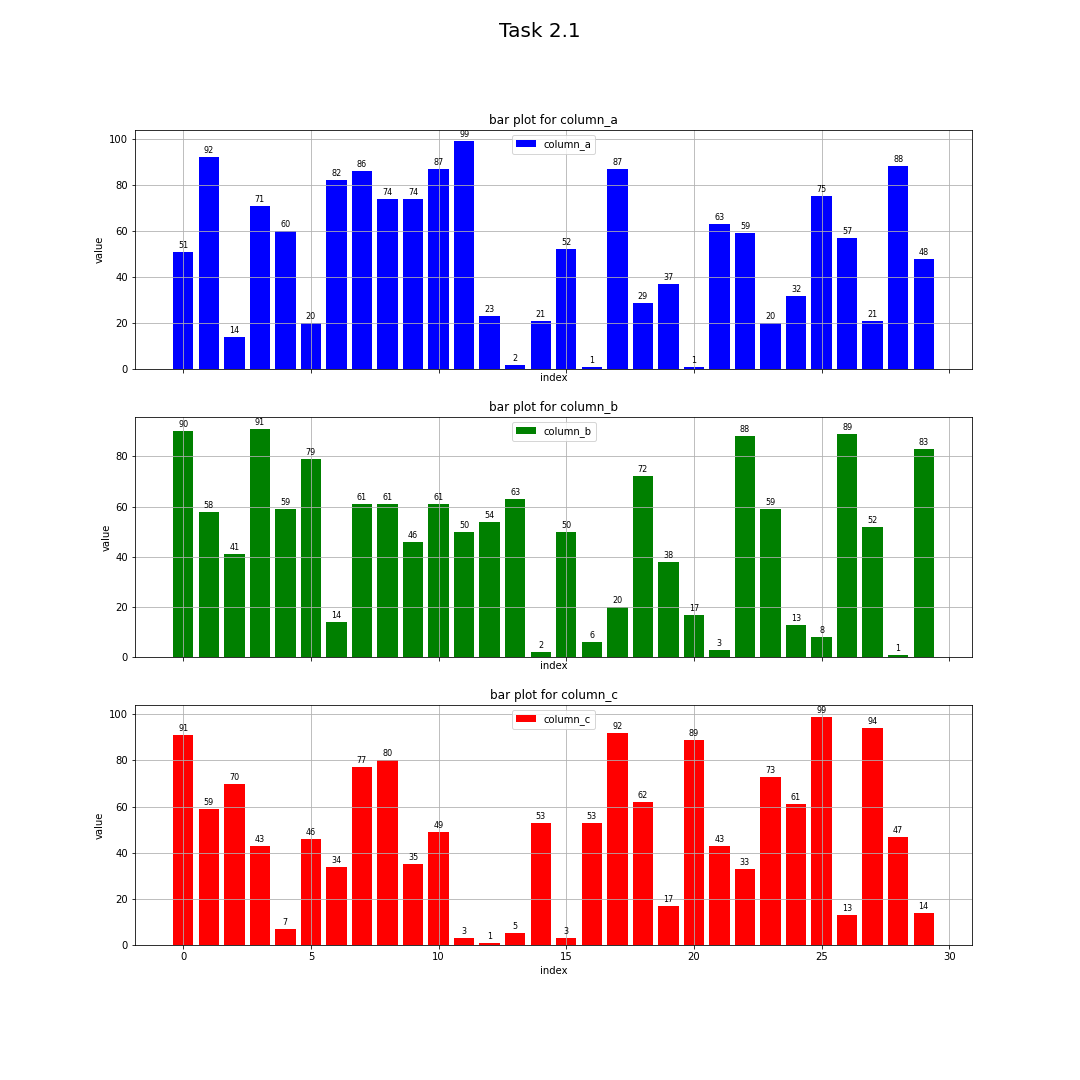

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1.png'))

*Решение*

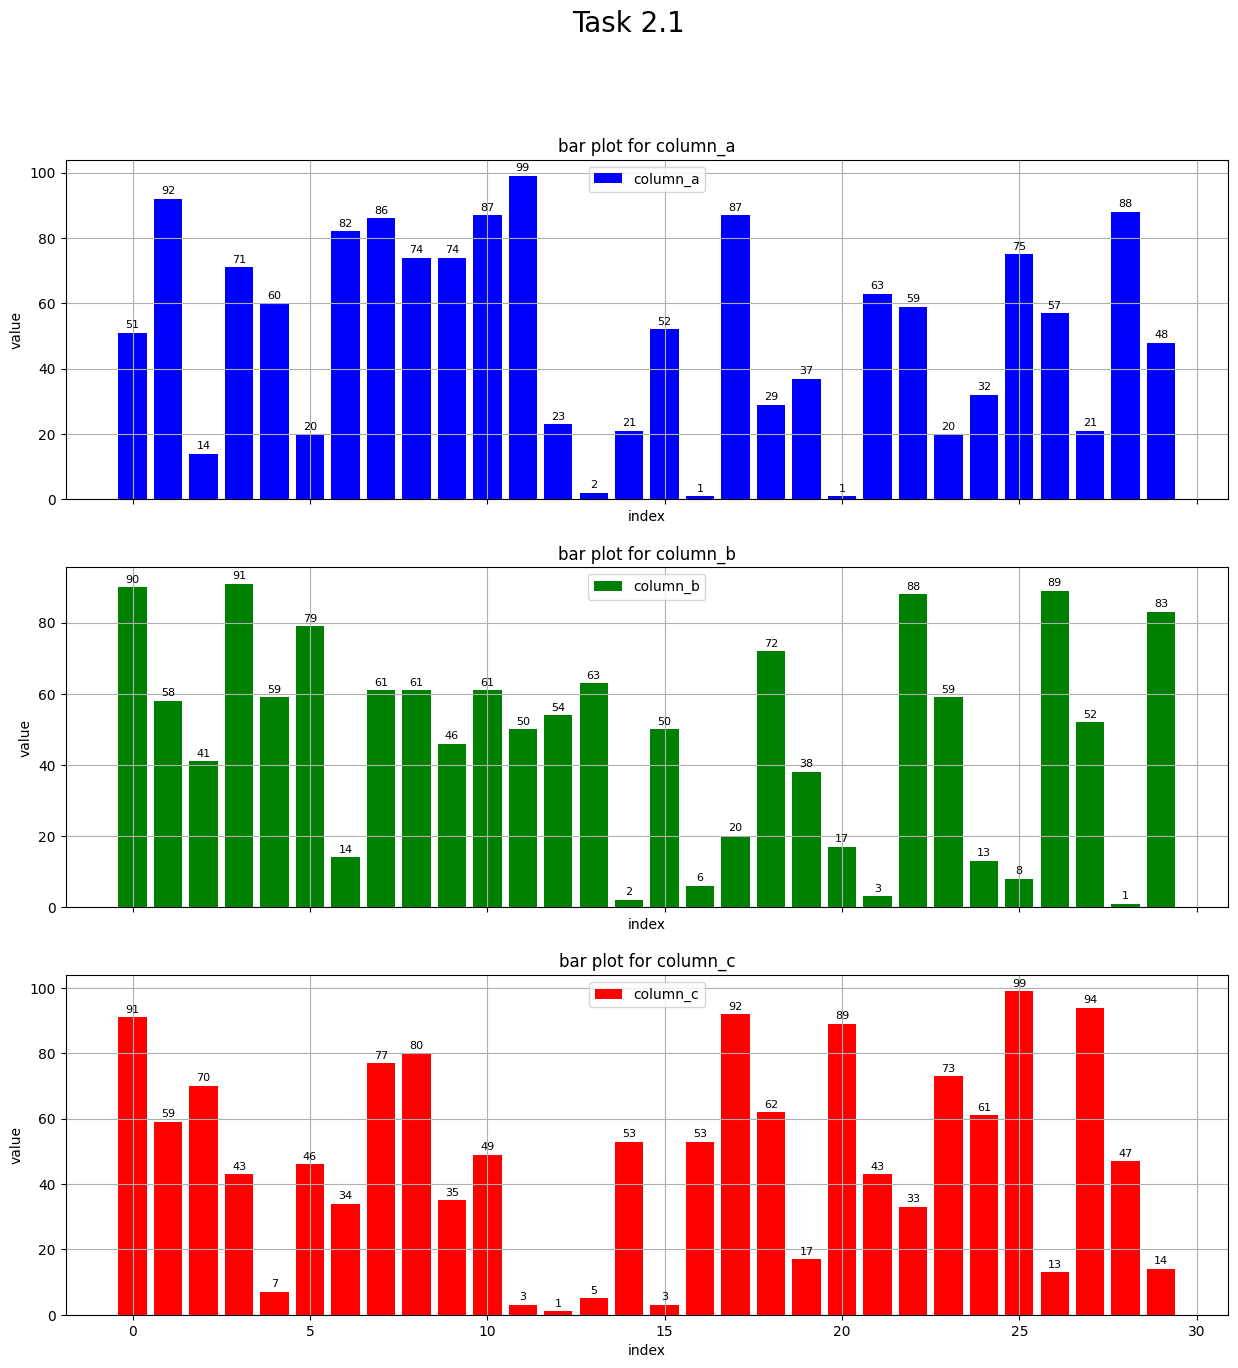

In [21]:
# fig.savefig(os.path.join(IMG_FOLDER, 'task2_1.png'))

**Также можно использовать df.plot от pandas**

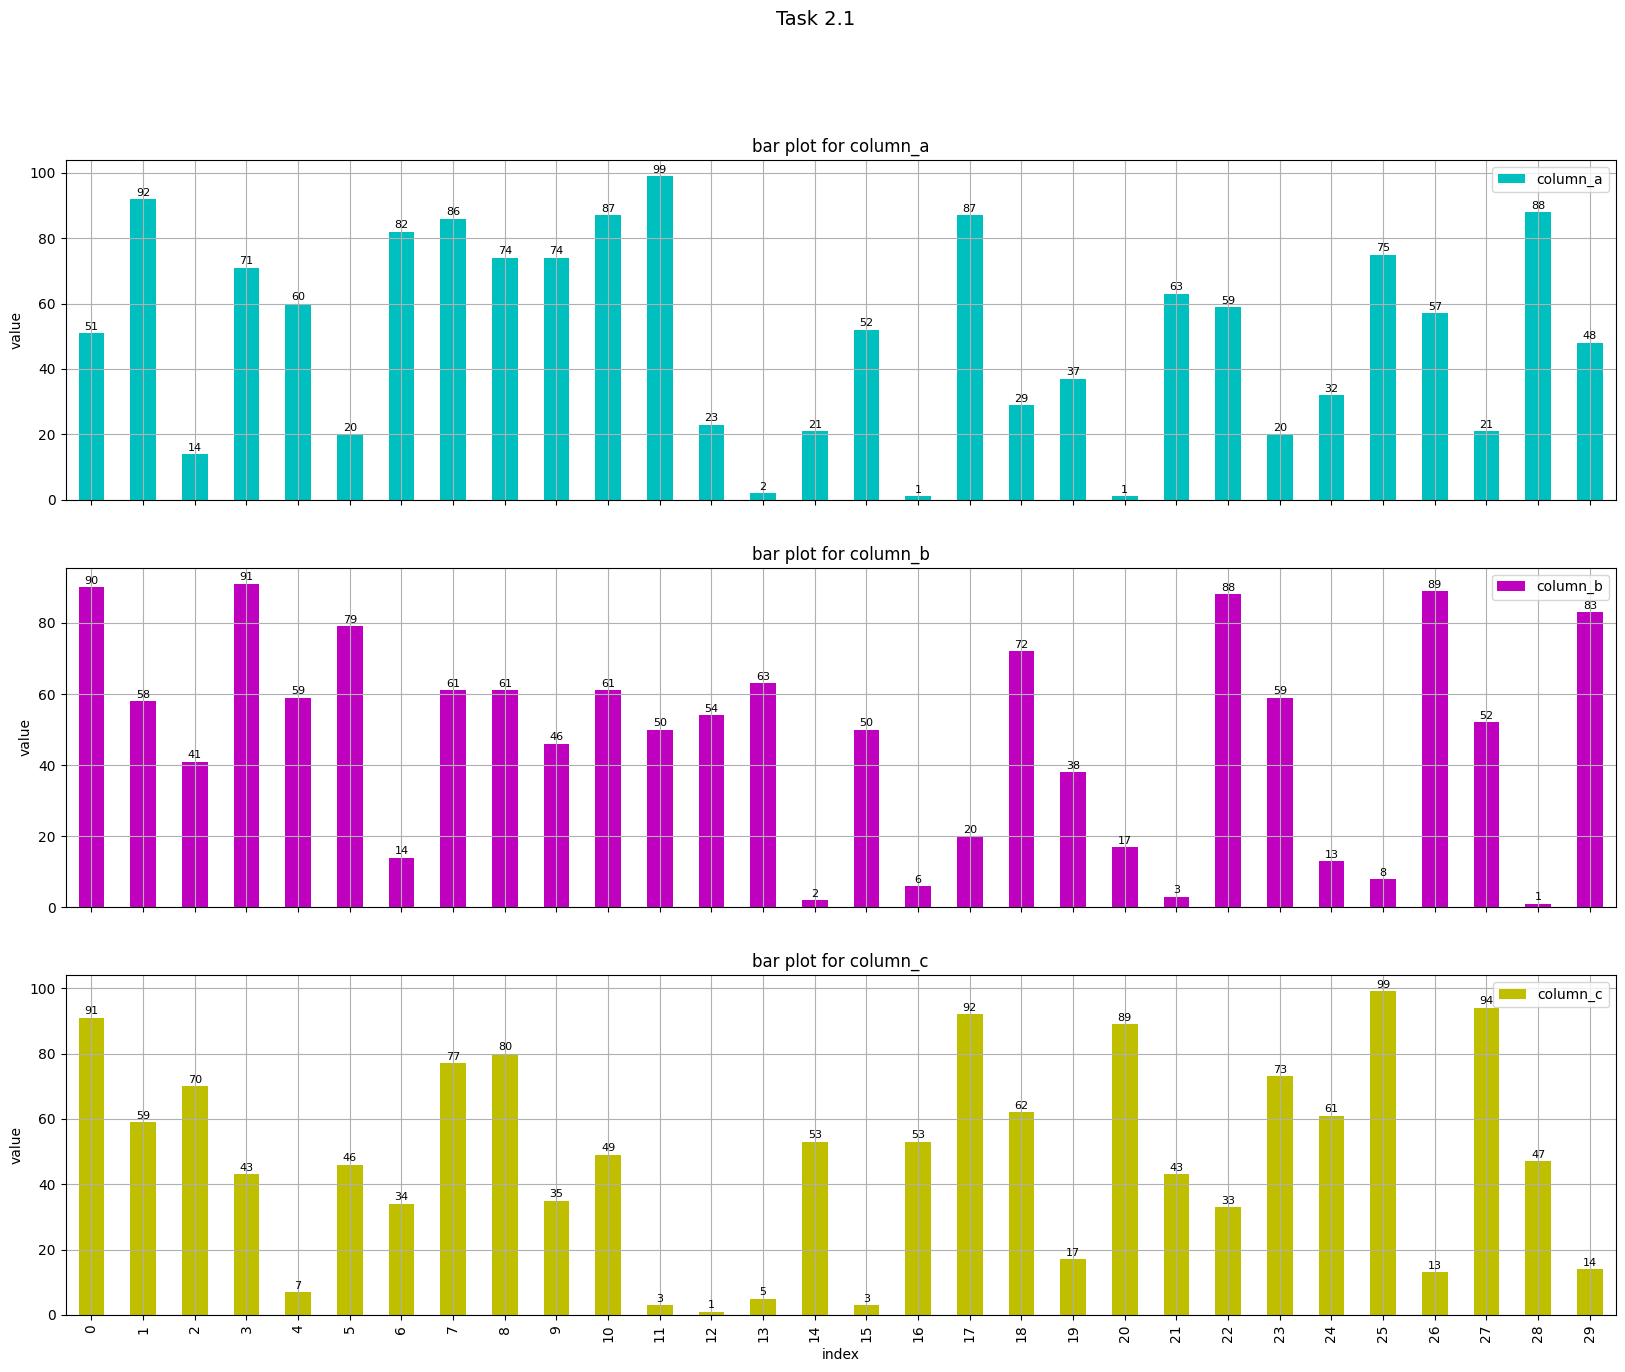

### Using Plotly

*Пример*

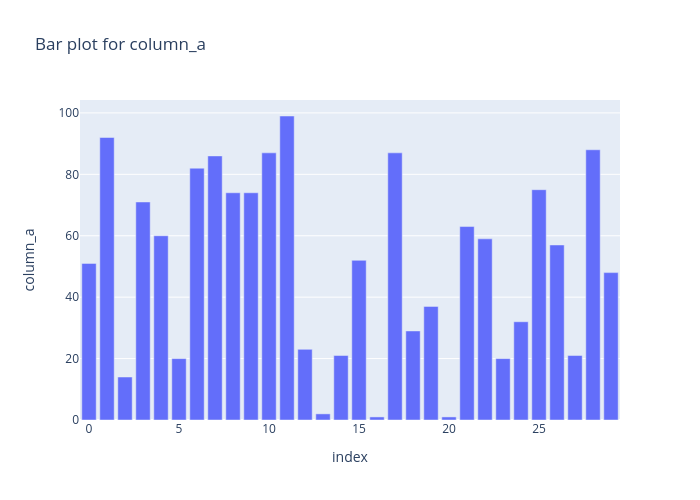

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1_plotly_1.png'))

*Решение*

In [24]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task2_1_plotly_1.png'))

**Попробуем отобразить все колонки сразу**

*Пример*

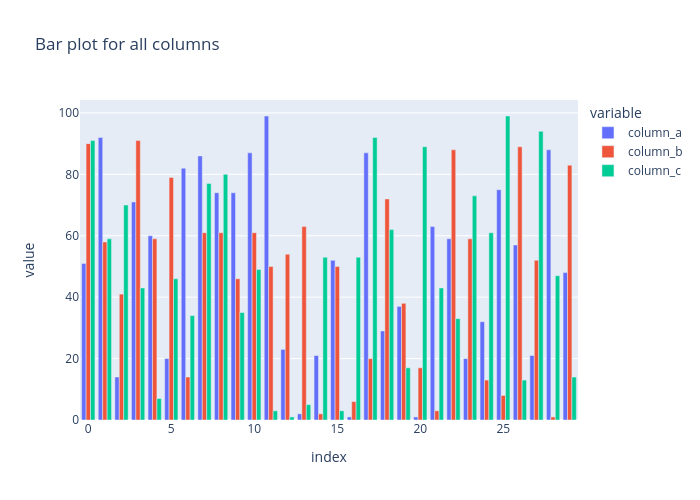

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1_plotly_2.png'))

*Решение*

In [ ]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task2_1_plotly_2.png'))

## Stacked Bar Plot

### Using Matplotlib

**Выделение разных частей в колонках**

Сделайте bar plot по всем колонкам (суммы) и цветами укажите "вклад" каждой колонки

*Пример*

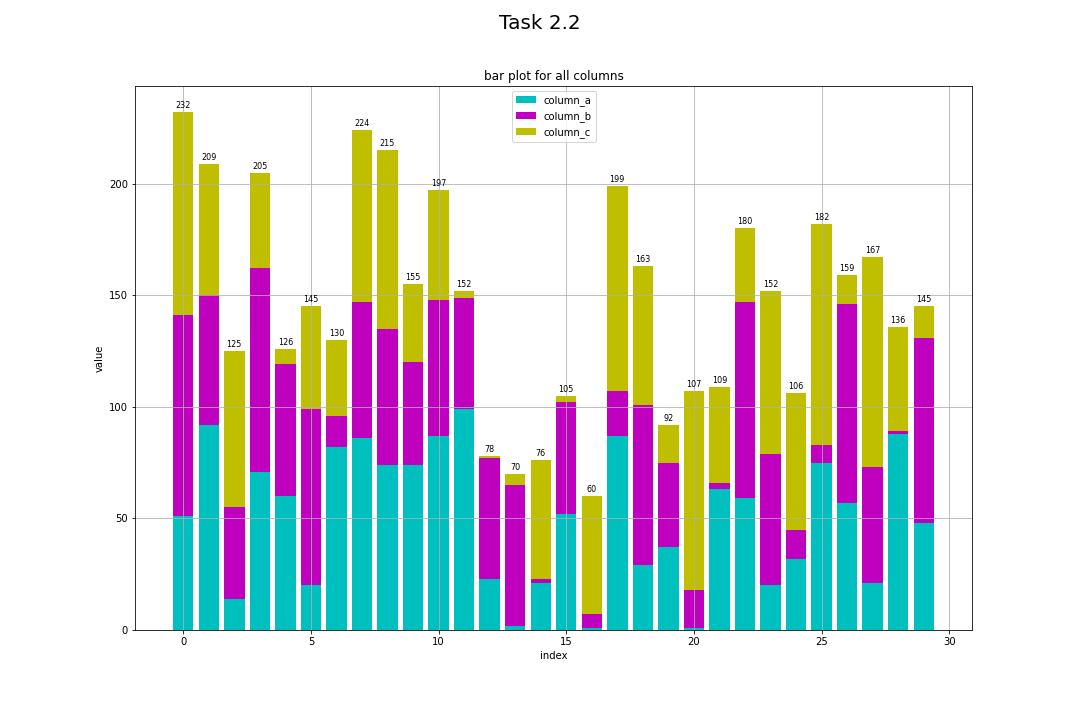

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task2_2.png'))

*Решение*

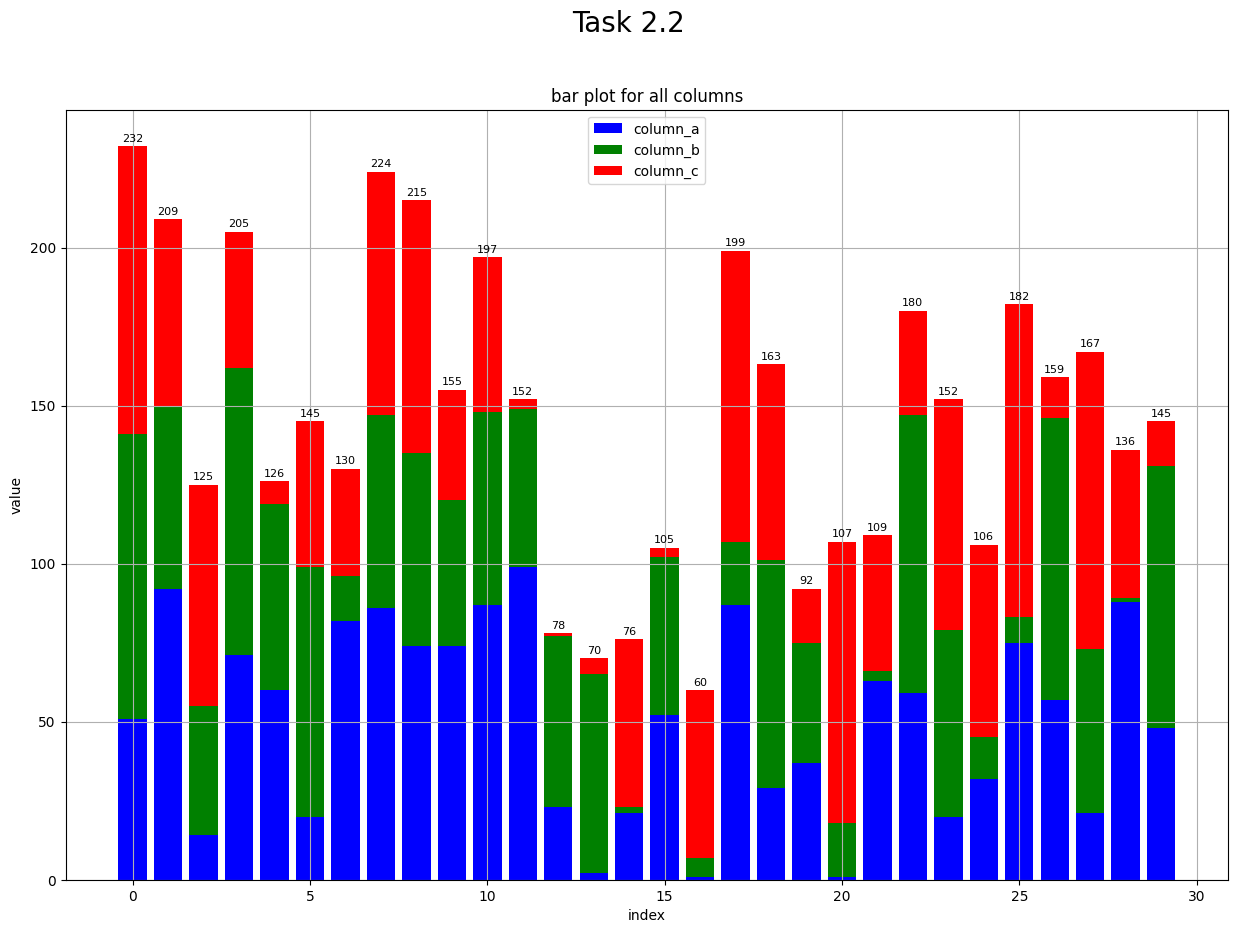

Убедимся, что наши значение похожи на правду

In [27]:
df.sum(1).values

array([232, 209, 125, 205, 126, 145, 130, 224, 215, 155, 197, 152,  78,
        70,  76, 105,  60, 199, 163,  92, 107, 109, 180, 152, 106, 182,
       159, 167, 136, 145])

In [28]:
# fig.savefig(os.path.join(IMG_FOLDER, 'task2_2.png'))

### Using Plotly

#### Convert Matplotlib graph to Plotly

Давайте попробуем написать небольшой "маппер" из графика выше с использованием matplotlib в plotly!

https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

Основной интересный для нас объект в bar plot -- это прямоугольник. Надо понять, какие параметры могут его задавать в plotly. Скорее всего это координаты: x, y, ширина

Попробуем сначала сконвертить один такой rectangle object в plotly

In [37]:
plotly_figure.show()

Вроде похоже на правду. Теперь надо проапдейтить фигуру другими столбиками. Нас интересуют только объекты типа Rectange

(Bar({
     'width': [0.8], 'x': [-0.4], 'y': [51]
 }),)

(0.8,)

Нашли наш Bar Plot в объекте фигуры. Теперь нужно добавить новые данные в списки с координатами по оси абсцисс, высотами и широтами

In [42]:
plotly_figure.show()

Хорошо. Но пока не хватает цвета и легенды

In [43]:
rectangle.get_facecolor()

(0.0, 0.0, 1.0, 1.0)

Цвет задается с помощью комбинации rgba(Red, Green, Blue, Alpha). Нужно скастить этот tuple в строку нужного формата. Например, так

In [44]:
tup = rectangle.get_facecolor()
f"rgb({','.join((np.array(tup[:3]) * 255).astype('int').astype('str'))})"

'rgb(0,0,255)'

Этот цвет можно дописать в цикл выше. В фигуре за цвет отвечает параметр 'marker_color', как в самом первом примере на plotly, который мы разбирали

Добавим подписи для осей

Можно еще подумать о том, как добавить красивую легенду с названиями колонок

*Пример*

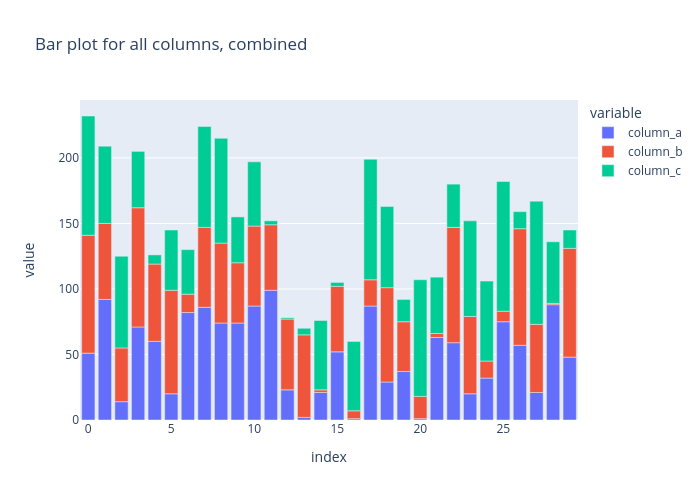

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task2_2_plotly.png'))

*Решение*

In [ ]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task2_2_plotly.png'))

# Exploring Kaggle Dataset with Seaborn

Для практики покрутите [датасет](https://www.kaggle.com/datasets/thec03u5/fifa-18-demo-player-dataset), основанный на данных из игры FIFA 18

Скачать данные с сайта можно в веб-интерфейсе после регистрации. Также у Kaggle есть [интерфейс](https://github.com/Kaggle/kaggle-api) для работы с командной строкой.

Хорошо написанный тутор с визуализацией данных выше:

- [Часть 1](https://www.kaggle.com/code/residentmario/faceting-with-seaborn)
- [Часть 2](https://www.kaggle.com/code/residentmario/multivariate-plotting/notebook)